In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [2]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3
x = np.linspace(-2, 4, 25)
y = f(x)

In [3]:
# MLPRegressor = Multilayer perceptron = DNN
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=3 * [256], learning_rate_init=0.03, max_iter=5000)

model.fit(x.reshape(-1, 1), y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [4]:
y_ = model.predict(x.reshape(-1, 1))
MSE = ((y - y_) ** 2).mean()
MSE

0.0054558649892266775

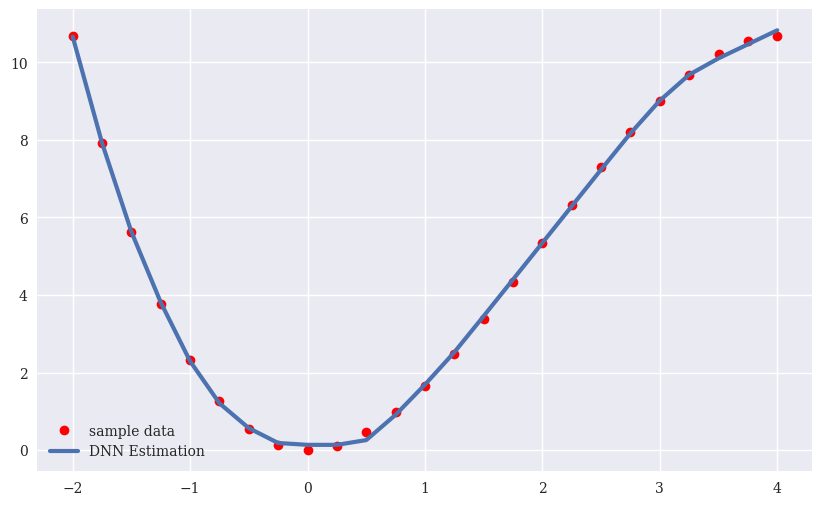

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='DNN Estimation')
plt.legend()

#### Keras

In [6]:
import tensorflow as tf 

from tensorflow import keras
tf.random.set_seed(100)

from keras.layers import Dense
from keras.models import Sequential 

In [7]:
model = Sequential()
# ReLU 활성화 유닛을 가지는 은닉층 추가
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
((y - y_) ** 2).mean()

0.0054558649892266775

1/1 [==============================] - 0s 231ms/step
round=1 | MSE=3.76073
1/1 [==============================] - 0s 56ms/step
round=2 | MSE=0.81686
1/1 [==============================] - 0s 52ms/step
round=3 | MSE=0.21197
1/1 [==============================] - 0s 57ms/step
round=4 | MSE=0.11210
1/1 [==============================] - 0s 51ms/step
round=5 | MSE=0.08622


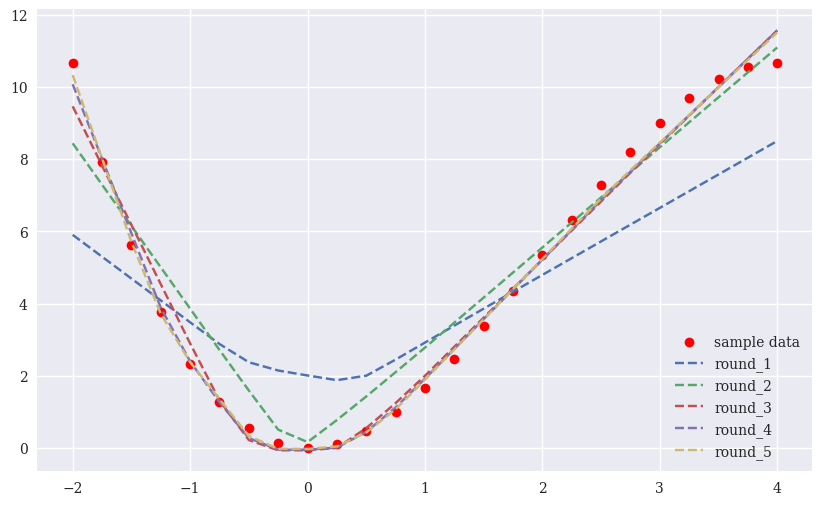

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round_{_}')
plt.legend()

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


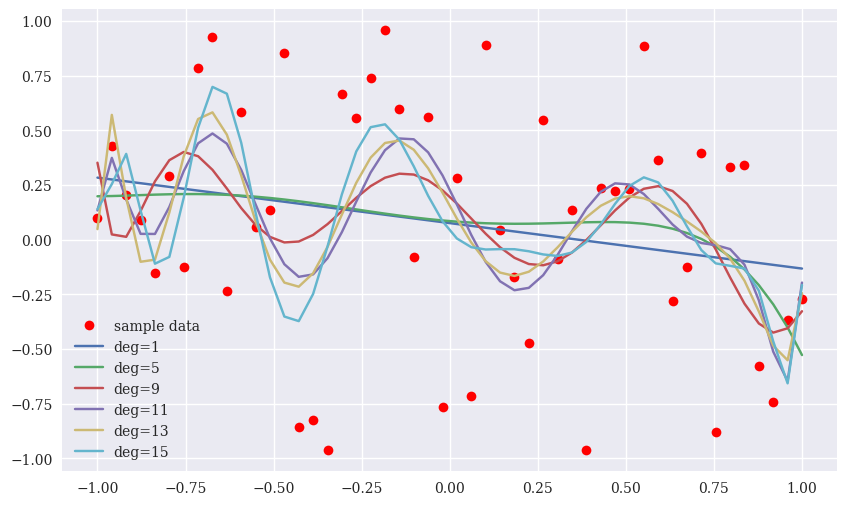

In [9]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend()

In [12]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


2/2 [==============================] - 0s 5ms/step
round=1 | MSE=0.15538
2/2 [==============================] - 0s 5ms/step
round=2 | MSE=0.12657
2/2 [==============================] - 0s 5ms/step
round=3 | MSE=0.10677
2/2 [==============================] - 0s 6ms/step
round=4 | MSE=0.09322
2/2 [==============================] - 0s 6ms/step
round=5 | MSE=0.06418
2/2 [==============================] - 0s 6ms/step
round=6 | MSE=0.02643
2/2 [==============================] - 0s 5ms/step
round=7 | MSE=0.00736
Wall time: 45 s


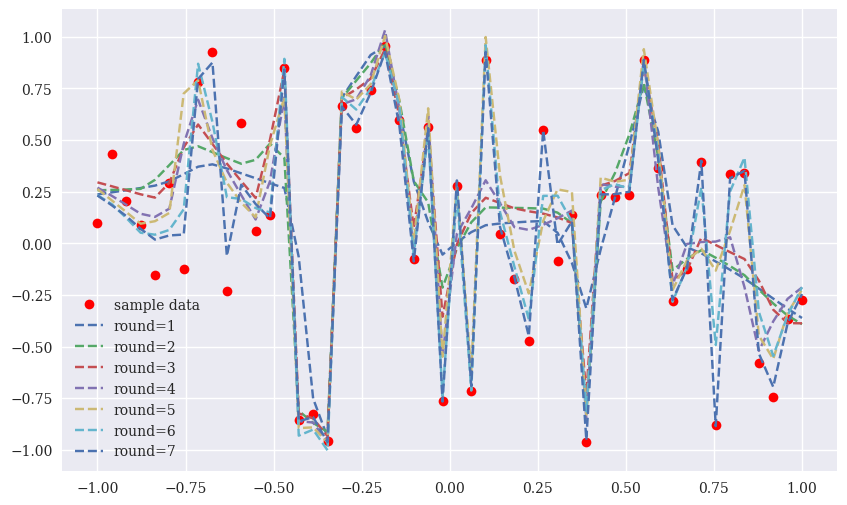

In [14]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()